In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp 
from sympy import *
import random
from scipy.linalg import expm
from sympy.physics.quantum import TensorProduct
import numpy as np 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
sp.init_printing()

In [2]:
def MTP(A,B):
    return TensorProduct(A,B)

In [3]:
#nomenculture like E01 ground energy of qubit 1 
E11,E01,P1, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
I2 = sp.eye(2)
a_dag = sp.Matrix([[0,0],
                   [1,0]])
sigmap = sp.Matrix([[0,0],[1,0]])
sigmam=sigmap.T
#state of our reservior system 
qr1 = sp.Matrix([[E01,P1.conjugate()],
                 [P1,E11]])
#hamil of res, if more tensor of all
qrh = qr1
c1 = sp.Matrix([[E_01,0],[0,E_11]])
#hamilt of comp sys
ch = c1
#hamil of total system is thus
Hh = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
#can edit values here if need be
E01,E_11c, E_01c = (0,0,0)

ch = ch.subs({"E_{11c}":E_11c, "E_{01c}":E_01c})
qrh = qrh.subs({"E_{11}":E11,"E_{01}":E01,"P_{1}":P1})
#just rewritting hamil with zero potential+gnd state
H = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
#now to introduce coupling 
def MTP(A,B):
    return TensorProduct(A,B)
H = H + J11.conjugate()*(MTP(sigmap,a_dag.T)) + J11 * (MTP(sigmam, a_dag))


In [4]:
#basis vector representation
gnd_state = np.array([[1],[0]])
exc_state = np.array([[0],[1]])

In [5]:
#simple function to choose random # from array that has been made
def rand_num_array(a):
    a = np.random.choice(a, size=1)
    return a[0]

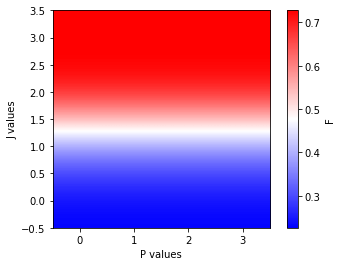

Variance E0 = 1 
J = [  1.  34.  67. 100.] 
P = [  1.  34.  67. 100.] 
E1 = 0.2450228320529214


In [41]:
E11,E01,P11, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
Hcopy = H
E0 = 1 
E11 = float(-E0/2 +(np.random.rand(1)*E0)) #onsite V for reservoir qubits
P11_array = np.linspace(1, 100, 4) / E0 #can reduce to 6?
J_array = np.linspace(1, 100, 4) / E0
list1={} #a dictionary
# for i in range(len(P11_array)):
#     list1["H_{0}".format(i)] = np.array(Hcopy.subs({"E_{11}":E11,"P_{1}":P11_array[i], "J_{11}":J_array[i]})).astype('complex128') * 1/E0

for i in range(len(P11_array)):
    list1["H_{0}".format(i)] = np.array(Hcopy.subs({"E_{11}":E11,"P_{1}":rand_num_array(P11_array), "J_{11}":rand_num_array(J_array)})).astype('complex128') * 1/E0

hbar = 1
t = 3 * E0/hbar #simulation time -> scaled time
list2 = {}
for i in range(len(P11_array)):
    list2["U_{0}".format(i)] = expm(-1j* list1["H_{0}".format(i)] * t)
x1 = random.random()
y1 = random.random()
x2 = random.random()
y2 = random.random()
z1 = complex(x1,y1)
z2 = complex(x2,y2)
psi_initial = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2)*(z1*MTP(gnd_state,gnd_state) + z2*MTP(exc_state,gnd_state)) 
list3={}
for i in range(len(P11_array)):
    list3["psi_{0}".format(i)] = list2["U_{0}".format(i)]@psi_initial #where t = 3 units
#list3['psi_2'],list3['psi_2'].T
list4 = {}
for i in range(len(P11_array)):
    list4["pho_{0}".format(i)] = MTP(list3["psi_{0}".format(i)],list3["psi_{0}".format(i)].T)
#list4['pho_3']
pho_c = {}
Id = np.eye(2) 
for i in range(len(P11_array)):
    pho_c["pho_c_{0}".format(i)] = MTP(Id, gnd_state.T)@list4['pho_{0}'.format(i)]@MTP(Id, gnd_state) + MTP(Id, exc_state.T)@list4['pho_{0}'.format(i)]@MTP(Id, exc_state)
#pho_c["pho_c_1"]

X_gate = np.array([[0,1],[1,0]])
psi_qubit = (gnd_state + exc_state) * 1/np.sqrt(2)
phi_ideal = X_gate@psi_qubit

F = {}
for i in range(len(P11_array)):
    F["F_{0}".format(i)] = phi_ideal.T @ pho_c["pho_c_{0}".format(i)] @ phi_ideal
#F['F_2']#[0][0])

F_array = np.zeros((len(P11_array), len(J_array)))
for i in range(len(P11_array)):
    for j in range(len(J_array)):
        F_array[i,j] = rand_num_array(abs(list(F.values())[i][0]))
#print('\n'P)
# fig, axs = plt.subplots(2,2)
# axs[0,0].plot(F_array, P11_array, 'b', label = 'comparison with P values')
# axs[0,0].legend()
# #axs[0,0].set_title('prob distribution of state |00>')
# axs[0,1].plot(F_array, J_array, 'g', label = 'comparison with J values')
# axs[0,1].legend()
# axs[1,0].plot(F_array**2, P11_array, 'b', label = 'P comparison with squared F')
# axs[1,0].legend()
# axs[1,1].plot(F_array**2, J_array, 'g', label = 'J comparison with squared F')
# axs[1,1].legend()
# for ax in axs.flat:
#     ax.set(xlabel='F(Top row) F^2(bottowm row)', ylabel='P(blue)&J(green)')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

fig, ax = plt.subplots()
#ax.set_aspect('auto')
#plt.imshow(Z.T, cmap='bwr', interpolation='bicubic')
pos = ax.imshow(F_array, cmap='bwr', interpolation='bicubic')
ax.invert_yaxis()
forceAspect(ax,aspect=1)
cbar = plt.colorbar(pos)
ax.set_xlabel('P values')
ax.set_ylabel('J values')
cbar.set_label(r'F')
plt.show()
print('Variance E0 =',E0,'\nJ =', J_array, '\nP =', P11_array, '\nE1 =', E11)



In [42]:
F_array

array([[0.22610683, 0.22610683, 0.22610683, 0.22610683],
       [0.35961828, 0.35961828, 0.35961828, 0.35961828],
       [0.72760437, 0.72760437, 0.72760437, 0.72760437],
       [0.72760437, 0.72760437, 0.72760437, 0.72760437]])

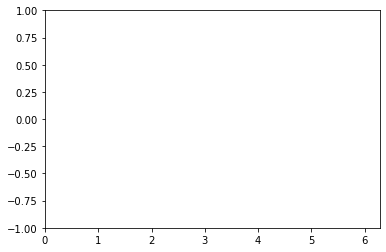

In [82]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = F_array, J_array
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [74]:
F

{'F_0': array([[-0.0430658+0.71612871j]]),
 'F_1': array([[0.00509885-0.84583671j]]),
 'F_2': array([[0.37255588-0.16436438j]]),
 'F_3': array([[0.17066704-0.6534656j]])}

In [65]:
abs(list(F.values())[2][0])

array([0.61914817])

In [48]:
rand_num_array(list(F.values())[0][0]), list(F.items())

((-0.08027384111236853-0.2113774118118814j),
 array([[-0.08027384-0.21137741j]]))

In [20]:
F_array = np.zeros(len(P11_array))
for i in range(len(P11_array)):
    F_array[i] = rand_num_array(abs(list(F.values())[i][0]))
F_array, F_array**2
        

(array([0.55859427, 0.25360584, 0.29599139, 0.55859427]),
 array([0.31202756, 0.06431592, 0.0876109 , 0.31202756]))

In [15]:
q=X_gate@psi_initial.reshape(2,2)
q.reshape(4,1), psi_initial

(array([[0.76659232+0.19437276j],
        [0.        +0.j        ],
        [0.38008456+0.47967821j],
        [0.        +0.j        ]]),
 array([[0.38008456+0.47967821j],
        [0.        +0.j        ],
        [0.76659232+0.19437276j],
        [0.        +0.j        ]]))

In [7]:
X_gate@psi_initial

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

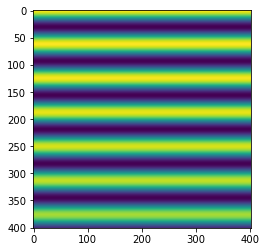

In [45]:
E11,E01,P11, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
Hcopy = H
E0 = 1 #variance of uniform distrib of energies E0 
#-> e11 derived here ->random

###################################################################################################################################

E11 = float(-E0/2 +(np.random.rand(1)*E0))
P11_array = np.linspace(1, 100, 50) / E0 #can reduce to 6?
J_array = np.linspace(1, 100, 50) / E0
list1={}
for i in range(len(P11_array)):
    list1["H_{0}".format(i)] = np.array(Hcopy.subs({"E_{11}":E11,"P_{1}":P11_array[i], "J_{11}":J_array[i]})).astype('complex128') * 1/E0
#output_example = list1["H_2"]

#also a random arrangement of P and J values combo 

#for i in range(len(P11_array)):
#    list1["H_{0}".format(i)] = np.array(Hcopy.subs({"E_{11}":E11,"P_{1}":rand_num_array(P11_array), "J_{11}":rand_num_array(J_array)})).astype('complex128') * 1/E0

###################################################################################################################################

hbar = 1
t = 3 * E0/hbar #simulation time -> scaled time
list2 = {}
for i in range(len(P11_array)):
    list2["U_{0}".format(i)] = expm(-1j* list1["H_{0}".format(i)] * t)
#output_example = list2["U_2"]

###################################################################################################################################

#now need a random set of psi_intial states, where psi_initial = comp (x) Vacuum state
#that is, psi_intial = z1|00> + z2|10> * 1/sqrt(|z1|^2+|z2|^2), z1 = x+iy
x1 = random.random()
y1 = random.random()
x2 = random.random()
y2 = random.random()
z1 = complex(x1,y1)
z2 = complex(x2,y2)
psi_initial = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2)*(z1*MTP(gnd_state,gnd_state) + z2*MTP(exc_state,gnd_state)) 

list3={}
for i in range(len(P11_array)):
    list3["psi_{0}".format(i)] = list2["U_{0}".format(i)]@psi_initial #where t = 3 units
    
###################################################################################################################################

# now lets try calculate pho for each final state psi that corresponds
# to each U operator that itself corresponds to each 
# P and J values
list4 = {}
for i in range(len(P11_array)):
    list4["pho_{0}".format(i)] = MTP(list3["psi_{0}".format(i)],["psi_{0}".format(i)].T) 

###################################################################################################################################

# now partial trace of this, where subsystem A = computational site = c
# and subsystem B = resercoir site = r 
pho_c = {}
Id = np.eye(2)
for i in range(len(P11_array)):
    pho_c["pho_c_{0}".format(i)] = MTP(Id, gnd_state.T)@list4['pho_{0}'.format(i)]@MTP(Id, gnd_state) + MTP(Id, exc_state.T)@list4['pho_{0}'.format(i)]@MTP(Id, exc_state)

###################################################################################################################################

# now lets calcualte the fidelity, where |phi_ideal> = X|psi_qubit>
# and fidelity F = <phi_ideal|pho_c|phi_ideal>

X_gate = np.array([[0,1],[1,0]])
psi_qubit = (gnd_state + exc_state) * 1/np.sqrt(2)
phi_ideal = X_gate@psi_qubit

F = {}
for i in range(len(P11_array)):
    F["F_{0}".format(i)] = phi_ideal.T @ pho_c["pho_c_{0}".format(i)] @ phi_ideal

###################################################################################################################################

# lets make 2D plots first, comparing F to J, F to P 

F_array = np.zeros(len(P11_array))
for i in range(len(P11_array)):
    F_array[i] = rand_num_array(abs(list(F.values())[i][0]))

fig, axs = plt.subplots(2,2)
axs[0,0].plot(F_array, P11_array, 'b', label = 'comparison with P values')
axs[0,0].legend()
#axs[0,0].set_title('prob distribution of state |00>')
axs[0,1].plot(F_array, J_array, 'g', label = 'comparison with J values')
axs[0,1].legend()
axs[1,0].plot(F_array**2, P11_array, 'y', label = 'P comparison with squared F')
axs[1,0].legend()
axs[1,1].plot(F_array**2, J_array, 'r', label = 'J comparison with squared F')
axs[1,1].legend()

# for ax in axs.flat:
#     ax.set(xlabel='time', ylabel='complex # squared')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()


###################################################################################################################################   

#lets try create  a mesh grid, a color map of the 2D space


fig, ax = plt.subplots()
X,Y = np.meshgrid(P11_array,J_array)
#ax.set_aspect('auto')
plt.imshow(X,Y,F_array, cmap='viridis', interpolation='bicubic')
plt.show()

###################################################################################################################################
# plt.plot(t, np.abs(a)**2, 'b', label = '|00>')
# plt.plot(t, np.abs(b)**2, 'g', label = '|01>')
# #plt.xlim(1.4,1.8) # to see if it goes zero
# # plt.plot(t, np.abs(c)**2, 'y', label = '|10>')
# # plt.plot(t, np.abs(d)**2, 'k', label = '|11>')
# plt.legend()
#plt.savefig('1_1withintialstate_00_compare.jpg')

In [89]:
psi_initial

array([[0.22199558+0.82911031j],
       [0.        +0.j        ],
       [0.00433345+0.51310357j],
       [0.        +0.j        ]])

In [22]:
Z, Y, t

(array([0.99640432, 0.98566901, 0.96794851, ..., 0.38179471, 0.3254715 ,
        0.2714825 ]),
 array([[0.99640432, 0.99640432, 0.99640432, ..., 0.99640432, 0.99640432,
         0.99640432],
        [0.98566901, 0.98566901, 0.98566901, ..., 0.98566901, 0.98566901,
         0.98566901],
        [0.96794851, 0.96794851, 0.96794851, ..., 0.96794851, 0.96794851,
         0.96794851],
        ...,
        [0.38179471, 0.38179471, 0.38179471, ..., 0.38179471, 0.38179471,
         0.38179471],
        [0.3254715 , 0.3254715 , 0.3254715 , ..., 0.3254715 , 0.3254715 ,
         0.3254715 ],
        [0.2714825 , 0.2714825 , 0.2714825 , ..., 0.2714825 , 0.2714825 ,
         0.2714825 ]]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 2.998e+00, 2.999e+00,
        3.000e+00]))

# ideal operation/states